In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('bank.csv', sep=';')

In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [4]:
df.head

<bound method NDFrame.head of       age            job   marital  education default  balance housing loan  \
0      30     unemployed   married    primary      no     1787      no   no   
1      33       services   married  secondary      no     4789     yes  yes   
2      35     management    single   tertiary      no     1350     yes   no   
3      30     management   married   tertiary      no     1476     yes  yes   
4      59    blue-collar   married  secondary      no        0     yes   no   
5      35     management    single   tertiary      no      747      no   no   
6      36  self-employed   married   tertiary      no      307     yes   no   
7      39     technician   married  secondary      no      147     yes   no   
8      41   entrepreneur   married   tertiary      no      221     yes   no   
9      43       services   married    primary      no      -88     yes  yes   
10     39       services   married  secondary      no     9374     yes   no   
11     43         admi

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [6]:
df_categorical = pd.get_dummies(df)
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 53 columns):
age                    4521 non-null int64
balance                4521 non-null int64
day                    4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
job_admin.             4521 non-null uint8
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-null uint8
job_student            4521 non-null uint8
job_technician         4521 non-null uint8
job_unemployed         4521 non-null uint8
job_unknown            4521 non-null uint8
marital_divorced       4521 non-null uint8
marital_married        4521 non-n

In [7]:
X_train = df_categorical.values
print(X_train)

[[  30 1787   19 ...    1    1    0]
 [  33 4789   11 ...    0    1    0]
 [  35 1350   16 ...    0    1    0]
 ...
 [  57  295   19 ...    1    1    0]
 [  28 1137    6 ...    0    1    0]
 [  44 1136    3 ...    0    1    0]]


In [8]:
from sklearn import preprocessing

In [9]:
print(X_train.shape)

(4521, 53)


In [10]:
df = pd.read_csv('bank.csv', sep=';', usecols=['y'])
y_train = df.values

In [11]:
print(y_train)

[['no']
 ['no']
 ['no']
 ...
 ['no']
 ['no']
 ['no']]


In [12]:
def apply(x):
    if x[0] == 'no':
        return [0]
    else:
        return [1]

In [13]:
y_train = list(map(lambda x : apply(x), y_train))

In [14]:
print(y_train)

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [1], [0], [1], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1],

In [15]:
print(X_train.shape)
y_train = np.array(y_train)
print(y_train.shape)

(4521, 53)
(4521, 1)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, shuffle=True)

In [18]:
norm = preprocessing.StandardScaler().fit(X_train)
X_train = norm.transform(X_train)

In [19]:
print(X_train.shape)
print(y_train.shape)

(3029, 53)
(3029, 1)


In [20]:
model = keras.Sequential([
        keras.layers.Dense(64, kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(256, kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(64, kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

W1019 13:04:28.733264 24268 deprecation.py:506] From C:\Users\fayaz\Anaconda3\lib\site-packages\tensorflow\python\keras\initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1019 13:04:28.757198 24268 deprecation.py:506] From C:\Users\fayaz\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [22]:
model.fit(X_train, y_train, batch_size=64, epochs=20)

W1019 13:04:29.184056 24268 deprecation.py:323] From C:\Users\fayaz\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
3029/3029 [==============================] - 2s 664us/sample - loss: 0.2911 - acc: 0.8772
Epoch 2/20
3029/3029 [==============================] - 1s 425us/sample - loss: 0.0625 - acc: 0.9921
Epoch 3/20
3029/3029 [==============================] - 2s 644us/sample - loss: 0.0046 - acc: 0.9997
Epoch 4/20
3029/3029 [==============================] - 3s 943us/sample - loss: 3.8582e-04 - acc: 1.0000
Epoch 5/20
3029/3029 [==============================] - 2s 702us/sample - loss: 1.8260e-04 - acc: 1.0000
Epoch 6/20
3029/3029 [==============================] - 2s 777us/sample - loss: 1.1397e-04 - acc: 1.0000
Epoch 7/20
3029/3029 [==============================] - 3s 865us/sample - loss: 7.9735e-05 - acc: 1.0000
Epoch 8/20
3029/3029 [==============================] - 1s 210us/sample - loss: 5.9254e-05 - acc: 1.0000
Epoch 9/20
3029/3029 [==============================] - 3s 912us/sample - loss: 4.5944e-05 - acc: 1.0000
Epoch 10/20
3029/3029 [==============================] - 4s 1ms/sam

In [23]:
norm = preprocessing.StandardScaler().fit(X_test)
X_test = norm.transform(X_test)

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print(test_acc)

1492/1492 [==============================] - 0s 136us/sample - loss: 2.3392e-05 - acc: 1.0000
1.0


In [25]:
predictions = model.predict(X_test)
print(predictions)

[[3.2782555e-07]
 [4.4703484e-07]
 [6.2584877e-07]
 ...
 [1.0251999e-05]
 [3.2782555e-07]
 [1.5199184e-06]]


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
def fn(x):
    if (x < 0.5):
        return 0
    else:
        return 1
    

In [28]:
predicted_labels = list(map(lambda x : fn(x), predictions))

In [29]:
print(predicted_labels)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix = confusion_matrix(y_test, predicted_labels)

In [32]:
print(confusion_matrix)

[[1323    0]
 [   0  169]]


[]

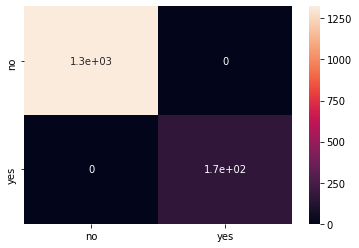

In [33]:
df_cm = pd.DataFrame(confusion_matrix, index = ['no', 'yes'], columns=['no', 'yes'])
plt.figure()
sns.heatmap(df_cm, annot=True)
plt.plot()